# Titanic Kaggle

## Introducción

Este reto es parte del Platzi Data Challenged, en el cual se presenta un problema que de debe resolver, además de una serie de preguntas que debes contestar con los datos aportados.

En este caso se usaran los datos de la pagina https://www.kaggle.com/c/titanic/data , Y se deben responder las siguientes preguntas:

- ¿Cuántas personas iban en el titanic? 
- ¿Cuántos hombres y mujeres sobrevivieron? 
- ¿Cuál fue el top 10 de edad que más sobrevieron y el top 10 de edad que no lo lograron? 4. ¿Cuántos cargos o títulos iban en el barco? Ejemplo: Capitanes, Mrs. Miss, etc. (Acá usarás expresiones regulares) 
- ¿Cuánto es la sumatoria del valor de los tickets en USD (yep en USD)?

## Importando Librerias y Datos

Se importan la librerías puestas en el archivo requirements.txt, en ella encontraremos:
- Numpy: Librería enfocada en operaciones numéricas y estadisticas
- Pandas: Libreria enfocada a la manipulación de datos como Dataframes


In [1]:
import pandas as pd
import numpy as np

Se importan los datos usando la libreria de pandas, estas se nombran de una forma que puedan ser facilmente identificadas.

In [15]:
df_gender = pd.read_csv('gender_submission.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [16]:
df_gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df_train

In [ ]:
df_test

### Uniendo los datos en un solo DataFrame

Como parte del reto, se pide que se unan los tres dataframe en uno solo. Esto tambien es parte de la rutina de un analista de datos, ya que para realizar los analisis es recomendado que los datos se encuentren en la misma tabla, para poder cruzar los datos de mejor forma.

Para ello se usara la función **merge**, que unira al **df_test** y **df_gender** a traves de la columna **PassengerID**

In [ ]:
df_1_merge = pd.merge(df_test,
                    df_gender, on = ['PassengerId'], how = 'inner')

In [ ]:
df_1_merge

#### Reubicación de columnas

Este paso es opcional, pero para mi comidad generare una variable con la columnas del df y las reubicare para poder concatenarla con el **df_train**

In [ ]:
cols = df_1_merge.columns.tolist()
col = cols[-1:] + cols[:-1]
col

In [ ]:
df_merge = df_1_merge[col]

In [ ]:
df_train = df_train[col]
df_train

#### Uso de la función concat

Para unir el df_train y el df_merge usamos la concatenación o la función **concat**, dado el dftrain hace referenia a una parte de los datos que se usan para **entrenar modelos de machine learning o de regresión**, por ello simplemente se unen uno bajo el otro

In [ ]:
df = pd.concat([df_train, df_merge], ignore_index = True)
df

## Generando Análisis

La función "describe" no da un analisis estadístico rápido de todas las variables numéricas del dataframe

In [ ]:
df.describe()

In [ ]:
df.columns

### Pregunta 1

In [ ]:
# Cuantos pasajeros habian
df['PassengerId'].count()

### Pregunta 2

In [ ]:
# Cuantos sobrevivientes por género
vivos = df.loc[df.Survived== 1]
vivos.groupby(['Sex'])['Survived'].count()

### Pregunta 3

Se tienen dos opciones:
- Análisis redondeando la edad de los niños menores de un año a 1 año exacto.
- Análisis sin ese cambio.

In [ ]:
# Tenemos dos posibilidades. Contar el top incluyendo a los niños menores de 1 año como si tuvieran 1 año o sin tomarlo
# de esa forma

df.loc[df['Age'] < 1, 'Age'] = 1
df

In [ ]:
vivos_2 = df.loc[df.Survived== 1]

top_survived_r = vivos_2.groupby(['Age'])['Survived'].count().sort_values(ascending=False).head(10)
top_survived_r

In [ ]:
# Top 10 de edades que más sobrevivieron
top_survived= vivos.groupby(['Age'])['Survived'].count().sort_values(ascending=False).head(10)
top_survived

In [ ]:
# Top 10 edades que más murieron
no_s = df.loc[df.Survived== 0]
top_no_s = no_s.groupby(['Age'])['Survived'].count().sort_values(ascending=False).head(10)
top_no_s

### Pregunta 4

In [ ]:
#Titulos
df['Title'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [ ]:
df.groupby(['Title'])['PassengerId'].count().sort_values(ascending=False)

### Pregunta 5

In [ ]:
#Sumatoria
df['Fare'].sum()

# -----------------------------------------------------------------------------

# Kaggle Competition

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [119]:
gender = pd.read_csv('gender_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [122]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
100*train.isnull().sum()/train.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [124]:
100*test.isnull().sum()/train.shape[0]

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64

In [125]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index= False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


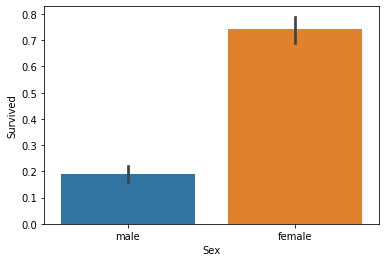

In [126]:
sns.barplot(x = "Sex", y="Survived", data=train)

In [127]:
train['Sex'] = train['Sex'] == 'male'
test['Sex'] = test['Sex'] == 'male'

In [128]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train[['FamilySize', 'Survived']].groupby(['FamilySize']).sum()

,Survived
FamilySize,
1,163
2,89
3,59
4,21
5,3
6,3
7,4
8,0
11,0


In [129]:
# Generamos la columnas de FamiliSize para el test
test['FamilySize'] = train['SibSp'] + train['Parch'] + 1

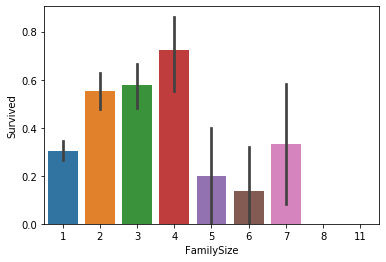

In [130]:
sns.barplot(x = "FamilySize", y = "Survived", data=train)

In [131]:
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

In [132]:
train[['Embarked','Survived']].groupby(['Embarked']).count()

,Survived
Embarked,
C,168
Q,77
S,644


In [133]:
train['Embarked'] =train['Embarked'].fillna('S')

In [134]:
100*test.isnull().sum()/train.shape[0]

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
FamilySize      0.000000
dtype: float64

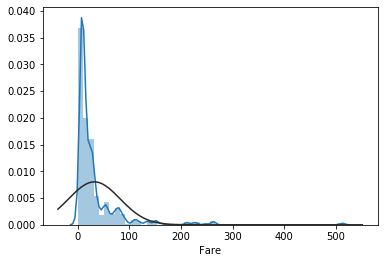

In [135]:
#Normalizar tarifa
sns.distplot(train['Fare'], fit = norm)

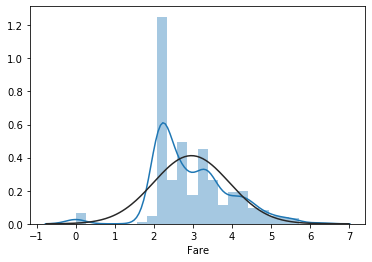

In [136]:
train['Fare'] = np.log1p(train['Fare'])
sns.distplot(train['Fare'], fit = norm)

In [137]:
train['FareGroup'] = pd.qcut(train['Fare'], 4 , labels=['A','B','C','D'])
train[['FareGroup','Survived']].groupby(['FareGroup'], as_index = False).mean()

,FareGroup,Survived
0,A,0.197309
1,B,0.303571
2,C,0.454955
3,D,0.581081


In [138]:
test['Fare'] = np.log1p(test['Fare'])
test['FareGroup'] = pd.qcut(test['Fare'], 4 , labels=['A','B','C','D'])

In [139]:
train.drop(['Fare'], axis=1, inplace=True)
test.drop(['Fare'], axis=1, inplace=True)

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    bool    
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Cabin        204 non-null    object  
 9   Embarked     891 non-null    object  
 10  FamilySize   891 non-null    int64   
 11  FareGroup    891 non-null    category
dtypes: bool(1), category(1), float64(1), int64(6), object(3)
memory usage: 71.7+ KB


In [141]:
# We can do a cabin analysis and generate groups for the differents cabin numbers and letters

In [142]:
# Age
# We fill the NA values with -0.5, group by the age and bins
train["Age"] = train["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

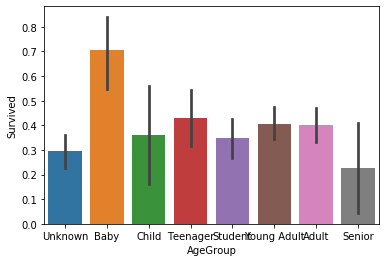

In [143]:
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

In [144]:
#Realizamos el mismo procedimieto para el DF de test
test["Age"] = test["Age"].fillna(-0.5)
test['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

In [145]:
# Remobemos la columna de edad, de este modo no debemos llenar las celdas vacias
train.drop(['Age'], axis=1, inplace=True)
test.drop(['Age'], axis=1, inplace=True)

In [146]:
#Importamos la libreria de expresiones regulares para poder trabajar con textos
import re
#Definimos una funacion para obtener los titulos de las personas 
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Aplicamos las funcion a traves del metodo apply en el set de train y el test
train['Title'] = train['Name'].apply(get_title)
test['Title'] = test['Name'].apply(get_title)

# Check the results
pd.crosstab(train['Title'], train['Sex'])

Sex,False,True
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [147]:
# A la columna Title le cambiamos, a traves del metodo replace, los distintos titulos que son cercanos por significado
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

# We create a relative table
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [148]:
# Realizamos los mismo para el DataFrame test
test['Title'] = test['Title'].replace(['Lady','Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle','Miss')
test['Title'] = test['Title'].replace('Ms','Miss')
test['Title'] = test['Title'].replace('Mme','Mrs')

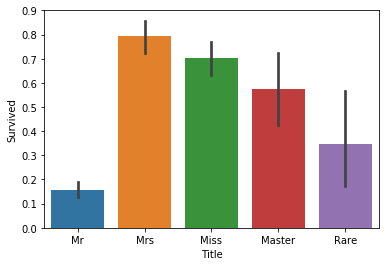

In [149]:
sns.barplot(x="Title", y="Survived", data=train)
plt.show()

In [150]:
# Ya que tengo a cada persona con su titulo, podemos eliminar el nombre, ya que no es una varible que se pueda usar para
# ayudar a entrenar a la red neuronal

train.drop(['Name'], axis=1, inplace = True)
test.drop(['Name'], axis=1, inplace = True)

In [151]:
# Procedemos tambien a eliminar la columna de la cabina ya que faltan más del 70% de los datos
train.drop(['Cabin'], axis=1, inplace = True)
test.drop(['Cabin'], axis=1, inplace = True)

In [152]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,FareGroup,AgeGroup,Title
0,1,0,3,True,1,0,S,2,A,Student,Mr
1,2,1,1,False,1,0,C,2,D,Adult,Mrs
2,3,1,3,False,0,0,S,1,B,Young Adult,Miss
3,4,1,1,False,1,0,S,2,D,Young Adult,Mrs
4,5,0,3,True,0,0,S,1,B,Young Adult,Mr


In [153]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,FareGroup,AgeGroup,Title
0,892,3,True,0,0,Q,2,A,Student,Mr
1,893,3,False,1,0,S,2,A,Adult,Mrs
2,894,2,True,0,0,Q,1,B,Young Adult,Mr
3,895,3,True,0,0,S,2,B,Young Adult,Mr
4,896,3,False,1,1,S,1,B,Young Adult,Mrs


In [154]:
train.drop('PassengerId', axis=1, inplace=True)
PassengerId = test['PassengerId']
X = train
Y = test.drop('PassengerId', axis=1).copy()

In [155]:
dataset = [X, Y]

In [156]:
col_norm = ['FamilySize','SibSp','Parch']

In [157]:
# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [158]:
#Tomamos el primer set del dataframe, que es el set de train y seleccionamos 
# las columnas a normalizar almacenadas en la lista de col_norm y la
# almacemaos en feature
features = dataset[0][col_norm]

# Luego generamos un scaler, donde estandarizamos con la funcion StandardScaler
# de sklearn y aplicamos el metodo fit (las que calcula la media y la std) 
# a features values
scaler = StandardScaler().fit(features.values)

#Aplicamos esta funcion con el metodo transform a los features, de este modo
features = scaler.transform(features.values)

In [159]:
#Una ves aplicado el scaler a los valores de feature se transforman
features

array([[ 0.05915988,  0.43279337, -0.47367361],
       [ 0.05915988,  0.43279337, -0.47367361],
       [-0.56097483, -0.4745452 , -0.47367361],
       ...,
       [ 1.29942929,  0.43279337,  2.00893337],
       [-0.56097483, -0.4745452 , -0.47367361],
       [-0.56097483, -0.4745452 , -0.47367361]])

In [160]:
# Luego se asignan estos valores de no
dataset[0][col_norm] = features
dataset[0].head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,FareGroup,AgeGroup,Title
0,0,3,True,0.432793,-0.473674,S,0.059160,A,Student,Mr
1,1,1,False,0.432793,-0.473674,C,0.059160,D,Adult,Mrs
2,1,3,False,-0.474545,-0.473674,S,-0.560975,B,Young Adult,Miss
3,1,1,False,0.432793,-0.473674,S,0.059160,D,Young Adult,Mrs
4,0,3,True,-0.474545,-0.473674,S,-0.560975,B,Young Adult,Mr
5,0,3,True,-0.474545,-0.473674,Q,-0.560975,B,Unknown,Mr
6,0,1,True,-0.474545,-0.473674,S,-0.560975,D,Adult,Mr
7,0,3,True,2.247470,0.767630,S,1.919564,C,Baby,Master
8,1,3,False,-0.474545,2.008933,S,0.679295,B,Young Adult,Mrs
9,1,2,False,0.432793,-0.473674,C,0.059160,C,Teenager,Mrs


In [161]:
features = dataset[1][col_norm]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [162]:
dataset[1][col_norm] = features
dataset[1].head(10)

,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,FareGroup,AgeGroup,Title
0,3,True,-0.499470,-0.400248,Q,0.016932,A,Student,Mr
1,3,False,0.616992,-0.400248,S,0.016932,A,Adult,Mrs
2,2,True,-0.499470,-0.400248,Q,-0.572859,B,Young Adult,Mr
3,3,True,-0.499470,-0.400248,S,0.016932,B,Young Adult,Mr
4,3,False,0.616992,0.619896,S,-0.572859,B,Young Adult,Mrs
5,3,True,-0.499470,-0.400248,S,-0.572859,B,Unknown,Mr
6,3,False,-0.499470,-0.400248,Q,-0.572859,A,Adult,Miss
7,2,True,0.616992,0.619896,S,1.786305,C,Baby,Mr
8,3,False,-0.499470,-0.400248,C,0.606723,A,Young Adult,Mrs
9,3,True,1.733455,-0.400248,S,0.016932,C,Teenager,Mr


In [163]:
cols = ['Pclass', 'Embarked', 'FareGroup', 'AgeGroup', 'Title']
titanic_cat = dataset[0][cols]
titanic_cat = pd.concat([pd.get_dummies(titanic_cat[col], prefix = col) for col in titanic_cat], axis=1)
titanic_cat.head()
dataset[0] = pd.concat([dataset[0][dataset[0].columns[~dataset[0].columns.isin(cols)]], titanic_cat], axis=1)
dataset[0].head()

,Survived,Sex,SibSp,Parch,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,True,0.432793,-0.473674,0.059160,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,False,0.432793,-0.473674,0.059160,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,False,-0.474545,-0.473674,-0.560975,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,False,0.432793,-0.473674,0.059160,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,True,-0.474545,-0.473674,-0.560975,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [164]:
titanic_cat = dataset[1][cols]
titanic_cat = pd.concat([pd.get_dummies(titanic_cat[col], prefix = col) for col in titanic_cat], axis=1)
titanic_cat.head()
dataset[1] = pd.concat([dataset[1][dataset[1].columns[~dataset[1].columns.isin(cols)]], titanic_cat], axis=1)
dataset[1].head()

,Sex,SibSp,Parch,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,True,-0.499470,-0.400248,0.016932,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,False,0.616992,-0.400248,0.016932,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,True,-0.499470,-0.400248,-0.572859,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,True,-0.499470,-0.400248,0.016932,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,False,0.616992,0.619896,-0.572859,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [165]:
dataset[0].columns.tolist()

['Survived',
 'Sex',
 'SibSp',
 'Parch',
 'FamilySize',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'FareGroup_A',
 'FareGroup_B',
 'FareGroup_C',
 'FareGroup_D',
 'AgeGroup_Unknown',
 'AgeGroup_Baby',
 'AgeGroup_Child',
 'AgeGroup_Teenager',
 'AgeGroup_Student',
 'AgeGroup_Young Adult',
 'AgeGroup_Adult',
 'AgeGroup_Senior',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare']

In [166]:
dataset[0]

,Survived,Sex,SibSp,Parch,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,True,0.432793,-0.473674,0.059160,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,False,0.432793,-0.473674,0.059160,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,False,-0.474545,-0.473674,-0.560975,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,False,0.432793,-0.473674,0.059160,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,True,-0.474545,-0.473674,-0.560975,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,True,-0.474545,-0.473674,-0.560975,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
887,1,False,-0.474545,-0.473674,-0.560975,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
888,0,False,0.432793,2.008933,1.299429,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
889,1,True,-0.474545,-0.473674,-0.560975,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [167]:
dataset[0].dtypes

Survived                  int64
Sex                        bool
SibSp                   float64
Parch                   float64
FamilySize              float64
Pclass_1                  uint8
Pclass_2                  uint8
Pclass_3                  uint8
Embarked_C                uint8
Embarked_Q                uint8
Embarked_S                uint8
FareGroup_A               uint8
FareGroup_B               uint8
FareGroup_C               uint8
FareGroup_D               uint8
AgeGroup_Unknown          uint8
AgeGroup_Baby             uint8
AgeGroup_Child            uint8
AgeGroup_Teenager         uint8
AgeGroup_Student          uint8
AgeGroup_Young Adult      uint8
AgeGroup_Adult            uint8
AgeGroup_Senior           uint8
Title_Master              uint8
Title_Miss                uint8
Title_Mr                  uint8
Title_Mrs                 uint8
Title_Rare                uint8
dtype: object

In [26]:
pd.get_dummies(train.Sex).iloc[:,1:]

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [28]:
pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:,1:]

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


## Get dummies for a DataFrame

In [ ]:
pd.get_dummies(train, columns=['Sex','Embarked'])